# Data preparation


In [1]:
!pip install requests

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
import datetime as dt
import keras
import zipfile
import time
import os
import math
import datetime
import pandas as pd
import pickle
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import logging
import imblearn
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from datetime import datetime, timedelta
from datetime import date
from dateutil import relativedelta
from io import StringIO
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.utils import shuffle
from io import StringIO
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline 
from subprocess import check_output
from IPython.display import display
from colorama import Fore, Back, Style
from scipy.stats import pearsonr

C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Load data

In [3]:
Months = ["Jan ", "Feb ", "Mar ", "Apr ", "May ", "Jun ", "July ", "Aug ", "Sept ", "Oct ", "Nov ", "Dec "]
Years = [ "2014" , "2015" , "2016" , "2017"]

for year in Years:
    for month in Months:
        file = 'data/ttc-streetcar-delay-data-' + year + '.xlsx'
        sheet =  month + year
        if( year == "2014"  and  month == "Jan " ): 
            data_original = pd.read_excel( file ,  sheet)
        if( year == "2017"  and  month == "Sept " ): 
            continue
        else:
            data_original = data_original.append(pd.read_excel( file ,  sheet))
            
print("Podaci su ucitani")

Podaci su ucitani


In [4]:
data_original

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0
...,...,...,...,...,...,...,...,...,...,...
1693,2017-12-31,501,19:58:00,Sunday,Queen,General Delay,7.0,15.0,B/W,NaN
1694,2017-12-31,501,21:15:00,Sunday,Queen and Neville park,Mechanical,12.0,24.0,W/B,4110.0
1695,2017-12-31,501,21:44:00,Sunday,Queen and Dufferin,Mechanical,12.0,24.0,W/B,1419.0
1696,2017-12-31,510,22:15:00,Sunday,Spadina and King,Mechanical,5.0,10.0,S/B,4447.0


In [5]:
data = data_original

In [6]:
data.head()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0


In [7]:
data.shape

(50374, 10)

In [8]:
data = data.drop(columns = ['Location'])

In [9]:
data.head()

,Report Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,3.0,6.0,E/B,4080.0


In [10]:
data.shape

(50374, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50374 entries, 0 to 1697
Data columns (total 9 columns):
Report Date    50374 non-null datetime64[ns]
Route          50374 non-null int64
Time           50374 non-null object
Day            50374 non-null object
Incident       50374 non-null object
Min Delay      50362 non-null float64
Min Gap        50360 non-null float64
Direction      50298 non-null object
Vehicle        46481 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 3.8+ MB


### Deleting data that contains a missing value

In [12]:
data.isna().values.any()

True

In [13]:
data.isna().any()

Report Date    False
Route          False
Time           False
Day            False
Incident       False
Min Delay       True
Min Gap         True
Direction       True
Vehicle         True
dtype: bool

In [14]:
data[data.isna().any(axis=1)]

,Report Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle
13,2014-01-03,501,05:29:00,Friday,Mechanical,4.0,11.0,W/B,NaN
16,2014-01-03,501,05:40:00,Friday,Mechanical,1.0,7.0,W/B,NaN
17,2014-01-03,506,05:47:00,Friday,Mechanical,5.0,11.0,E/B,NaN
19,2014-01-03,506,05:48:00,Friday,Mechanical,5.0,11.0,E/B,NaN
20,2014-01-03,511,05:54:00,Friday,Mechanical,6.0,11.0,N/B,NaN
...,...,...,...,...,...,...,...,...,...
1591,2017-12-29,504,17:00:00,Friday,General Delay,12.0,16.0,E/B,NaN
1615,2017-12-30,501,09:22:00,Saturday,Utilized Off Route,6.0,12.0,B/W,NaN
1635,2017-12-30,511,15:01:00,Saturday,Emergency Services,43.0,8.0,W/B,NaN
1674,2017-12-31,504,13:00:00,Sunday,General Delay,5.0,8.0,B/W,NaN


In [15]:
data = data.dropna()

In [16]:
data.isna().any()

Report Date    False
Route          False
Time           False
Day            False
Incident       False
Min Delay      False
Min Gap        False
Direction      False
Vehicle        False
dtype: bool

In [17]:
data.isna().values.any()

False

In [18]:
print("Number of data containing mising value - " , data[data.isna().any(axis=1)].shape[0] )

Number of data containing mising value -  0


In [19]:
data.shape

(46424, 9)

# Adding a Delay column 
Delay column will have a value of 0 if the value in the Min Delay column is 0 otherwise it will have a value of 1. 0 means no delay. 1 means there are delays.

In [20]:
data["Delay"] = [0 if x == 0 else 1 for x in data['Min Delay'] ]

In [21]:
data = data.drop(columns=['Min Delay'])

In [22]:
data.head()

,Report Date,Route,Time,Day,Incident,Min Gap,Direction,Vehicle,Delay
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,8.0,E/B,4018.0,1
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,22.0,E/B,4128.0,1
2,2014-01-02,501,14:01:00,Thursday,Held By,19.0,W/B,4016.0,1
3,2014-01-02,504,14:22:00,Thursday,Investigation,11.0,W/B,4175.0,1
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,6.0,E/B,4080.0,1


In [23]:
data[data['Delay'] == 0].shape[0]

730

In [24]:
data[data['Delay'] == 1].shape[0]

45694

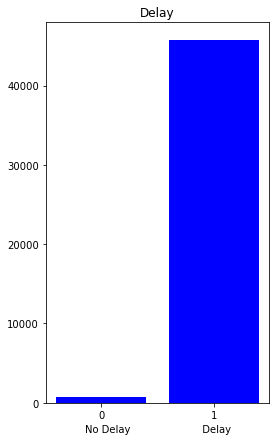

In [25]:
fig = plt.figure(figsize=(4, 7))
plt.bar(data['Delay'].unique(), data['Delay'].value_counts(), color='blue')
plt.xticks([0, 1])  
plt.xlabel('No Delay                       Delay')
plt.title("Delay")
plt.show()

### Clean up Direction

I will Unified directions. <br> Direction should be categorized and can have 4 valid values: e - for Eastbound, w - for Westbound, s - for Southbound, n - for Northbound. 

In [26]:
valid_directions = ['e','w','s','n']   

In [27]:
data['Direction'].unique() 

array(['E/B', 'W/B', 'S/B', 'N/B', 'EB', 'WB', 'B/W', 's', 'NB', 'wb',
       'eb', 'w/b', 'ew', 'b/w', 'eastbound', 'w', 'sb', 'southbound',
       'northbound', 'Service adjusted.', 'westbound', 'nb', 'b#', 'SB',
       'we', 'EW', 'E', 'Service adjusted', 'W', '14', 's/b', '5', 'Bw',
       '0', 'sw', '2', '506', '54495', '4075', 'bs', 'wruiter adv',
       '(Ref', 'e', '9', 'gap', '1114', 'run', 'ss', '19', '68029',
       'eb``', '6', '512', 'W`', 'n/b', '\\5', '10', '4', '7', '13',
       '-BD#', '30', '`', '510', 'w.b', '\\', '26', 'W\\B', 'N', '20',
       '8', 'e/b', 'ee', '.', 'See also', 'w/B', 'E5'], dtype=object)

In [28]:
print( "Number of All Direction from original data set", data['Direction'].nunique() )

Number of All Direction from original data set 77


In [29]:
data['Direction'] = data['Direction'].str.lower().str.replace('/','')
data['Direction'] = data['Direction'].replace({'eastbound':'e','westbound':'w','southbound':'s','northbound':'n'})
data['Direction'] = data['Direction'].replace('b','',regex=True)

In [30]:
 data = data[data['Direction'].isin(valid_directions)]

In [31]:
print( "Direction after cleanup", data['Direction'].unique() )

Direction after cleanup ['e' 'w' 's' 'n']


In [32]:
data

,Report Date,Route,Time,Day,Incident,Min Gap,Direction,Vehicle,Delay
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,8.0,e,4018.0,1
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,22.0,e,4128.0,1
2,2014-01-02,501,14:01:00,Thursday,Held By,19.0,w,4016.0,1
3,2014-01-02,504,14:22:00,Thursday,Investigation,11.0,w,4175.0,1
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,6.0,e,4080.0,1
...,...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,Sunday,Held By,16.0,e,4164.0,1
1694,2017-12-31,501,21:15:00,Sunday,Mechanical,24.0,w,4110.0,1
1695,2017-12-31,501,21:44:00,Sunday,Mechanical,24.0,w,1419.0,1
1696,2017-12-31,510,22:15:00,Sunday,Mechanical,10.0,s,4447.0,1


### Delay by days

In [33]:
Monday = data[data['Day'] == 'Monday']['Delay']

Tuesday = data[data['Day'] == 'Tuesday']['Delay']

Wednesday = data[data['Day'] == 'Wednesday']['Delay']

Thursday = data[data['Day'] == 'Thursday']['Delay']

Friday = data[data['Day'] == 'Friday']['Delay']

Saturday = data[data['Day'] == 'Saturday']['Delay']

Sunday = data[data['Day'] == 'Sunday']['Delay']

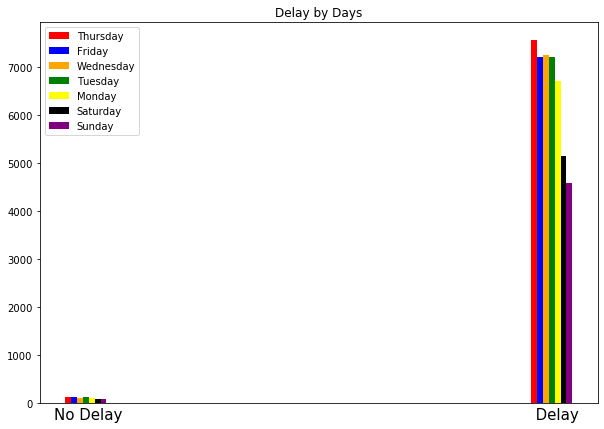

In [34]:
fig = plt.figure(figsize=(10, 7))
  
plt.title("Delay by Days")
plt.xticks([])         
plt.xlabel('No Delay                                                                                       Delay ', fontsize = 15)
plt.hist([Thursday , Friday , Wednesday , Tuesday , Monday , Saturday , Sunday ], color=['red', 'blue', 'orange','green', 'yellow', 'black', 'purple'], label=['Thursday' , 'Friday' , 'Wednesday' , 'Tuesday' , 'Monday' , 'Saturday' , 'Sunday'])
plt.legend(loc='best')
plt.show()

### Delay after Incidents

In [35]:
data['Incident'].unique()

array(['Late Leaving Garage', 'Utilized Off Route', 'Held By',
       'Investigation', 'Mechanical', 'Emergency Services', 'Diversion',
       'General Delay', 'Overhead - Pantograph'], dtype=object)

In [37]:
Late_Leaving_Garage = data[data['Incident'] == 'Late Leaving Garage']['Delay']

Utilized_Off_Route = data[data['Incident'] == 'Utilized Off Route']['Delay']

Held_By = data[data['Incident'] == 'Held By']['Delay']

Investigation = data[data['Incident'] == 'Investigation']['Delay']

Mechanical = data[data['Incident'] == 'Mechanical']['Delay']

Emergency_Services = data[data['Incident'] == 'Emergency Services']['Delay']

Diversion = data[data['Incident'] == 'Diversion']['Delay']

General_Delay = data[data['Incident'] == 'General Delay']['Delay']

Overhead_Pantograph = data[data['Incident'] == 'Overhead - Pantograph']['Delay']


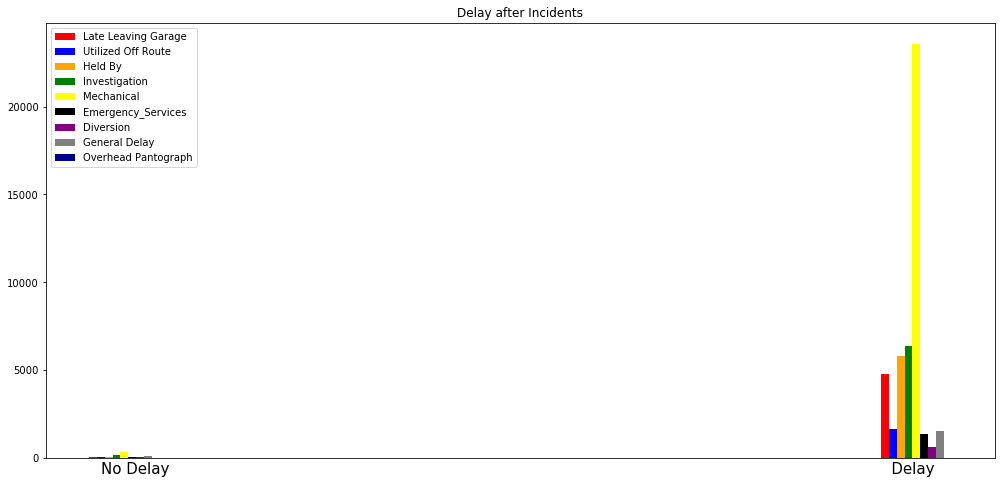

In [39]:
fig = plt.figure(figsize=(17, 8))
  
plt.title("Delay after Incidents")
plt.xticks([])         
plt.xlabel('No Delay                                                                                                                                                        Delay ', fontsize = 15)
plt.hist([Late_Leaving_Garage , Utilized_Off_Route , Held_By , Investigation , Mechanical , Emergency_Services , Diversion, General_Delay, Overhead_Pantograph], color=['red', 'blue', 'orange','green', 'yellow', 'black', 'purple', 'grey', 'darkblue'], label=['Late Leaving Garage' , 'Utilized Off Route' , 'Held By' , 'Investigation' , 'Mechanical' , 'Emergency_Services' , 'Diversion', 'General Delay', 'Overhead Pantograph'])
plt.legend(loc='best')
plt.show()

### Delay by Direction

In [40]:
Eastbound = data[data['Direction'] == 'e']['Delay']    

Westbound = data[data['Direction'] == 'w']['Delay']

Southbound = data[data['Direction'] == 's']['Delay']

Northbound = data[data['Direction'] == 'n']['Delay']

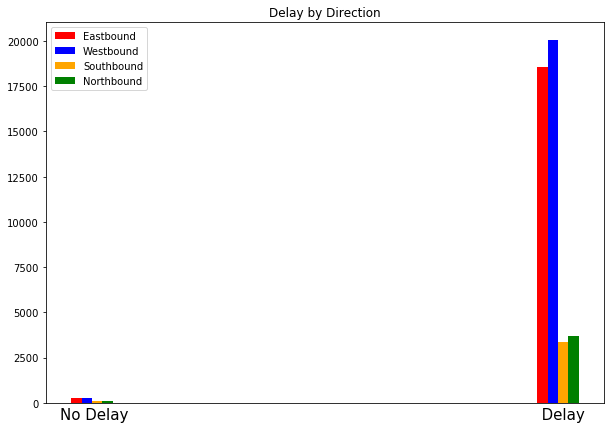

In [41]:
fig = plt.figure(figsize=(10, 7))
  
plt.title("Delay by Direction")
plt.xticks([])         
plt.xlabel('No Delay                                                                                       Delay ', fontsize = 15)
plt.hist([Eastbound, Westbound, Southbound, Northbound], color=['red', 'blue', 'orange','green'], label=['Eastbound', 'Westbound', 'Southbound', 'Northbound'])
plt.legend(loc='best')
plt.show()

### Conversion of values in columns Vehicle and Min Gap to int

In [45]:
data = data.astype({ "Vehicle": int, "Min Gap": int })

In [46]:
data.head()

,Report Date,Route,Time,Day,Incident,Min Gap,Direction,Vehicle,Delay
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,8,e,4018,1
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,22,e,4128,1
2,2014-01-02,501,14:01:00,Thursday,Held By,19,w,4016,1
3,2014-01-02,504,14:22:00,Thursday,Investigation,11,w,4175,1
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,6,e,4080,1


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46364 entries, 0 to 1697
Data columns (total 9 columns):
Report Date    46364 non-null datetime64[ns]
Route          46364 non-null int64
Time           46364 non-null object
Day            46364 non-null object
Incident       46364 non-null object
Min Gap        46364 non-null int32
Direction      46364 non-null object
Vehicle        46364 non-null int32
Delay          46364 non-null int64
dtypes: datetime64[ns](1), int32(2), int64(2), object(4)
memory usage: 3.2+ MB


### Clean up Route

I will remove data with invalid routes that are not in full list of currently used routes by the Toronto streetcar system 

In [48]:
valid_routes = ['501','502','503','504','505','506','509','510','511','512','301','304','306','310']

In [49]:
len(valid_routes)

14

In [50]:
data['Route'].unique()

array([505, 504, 501, 510, 512, 511, 506, 503, 502, 509, 301, 401, 905,
       508,  25,   2,  50, 805, 306, 111,  23,  35,  18,  51,   5,  62,
        57,   4, 405, 500,  68,  20,   8,  63, 201,  65, 210, 204,   9,
        17,  21,  33,  24,  49,  40, 550,  12, 375,   1,   7, 807,   3,
       804,  16,  45,  10, 536,  93, 304,  41,  37,  11, 205, 317,  13,
        22, 535,  14,  83, 514,  81,  15,  55, 999, 519,  43,   6,  56,
        19, 830, 705,  61,  80,  26,  29, 516,  54, 595, 596, 310,  64,
        87, 591], dtype=int64)

In [51]:
data['Route'].nunique()

93

In [52]:
data = data[data['Route'].isin(valid_routes)]

In [53]:
data['Route'].unique()

array([505, 504, 501, 510, 512, 511, 506, 503, 502, 509, 301, 306, 304,
       310], dtype=int64)

In [54]:
data['Route'].nunique()

14

In [55]:
data.shape

(45044, 9)

### One - hot encoding

In machine learning, one-hot encoding is a frequently used method to deal with categorical data. Because many machine learning models need their input variables to be numeric I will transform categorical variables Direction, Incident and Day using one-hot encoding.

In [56]:
data['Direction'].value_counts()

w    19668
e    18319
n     3686
s     3371
Name: Direction, dtype: int64

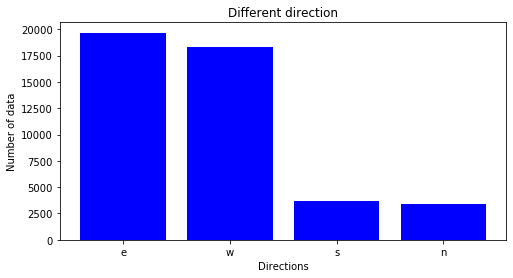

In [57]:
fig = plt.figure(figsize=(8, 4))
  
# creating the bar plot
plt.bar(data['Direction'].unique(), data['Direction'].value_counts(), color='blue')
  
plt.xlabel("Directions")
plt.ylabel("Number of data")
plt.title("Different direction")
plt.show()

In [58]:
data = pd.get_dummies(data, columns=['Direction'])

In [59]:
data['Incident'].value_counts()

Mechanical               23368
Investigation             6324
Held By                   5581
Late Leaving Garage       4699
Utilized Off Route        1593
General Delay             1535
Emergency Services        1310
Diversion                  627
Overhead - Pantograph        7
Name: Incident, dtype: int64

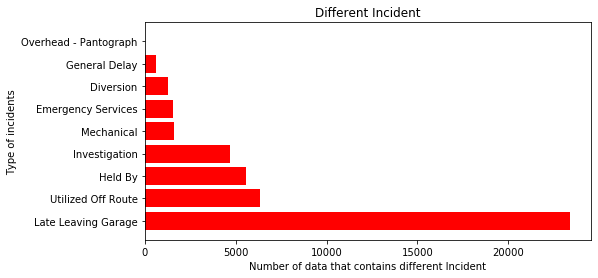

In [60]:
fig = plt.figure(figsize=(8, 4))
  
# creating the bar plot
plt.barh(data['Incident'].unique(), data['Incident'].value_counts(), color='red')
  
plt.xlabel("Number of data that contains different Incident")
plt.ylabel("Type of incidents")
plt.title("Different Incident")
plt.show()

In [61]:
data = pd.get_dummies(data, columns=['Incident'])

In [62]:
data['Day'].value_counts()

Thursday     7473
Friday       7127
Wednesday    7116
Tuesday      7094
Monday       6624
Saturday     5087
Sunday       4523
Name: Day, dtype: int64

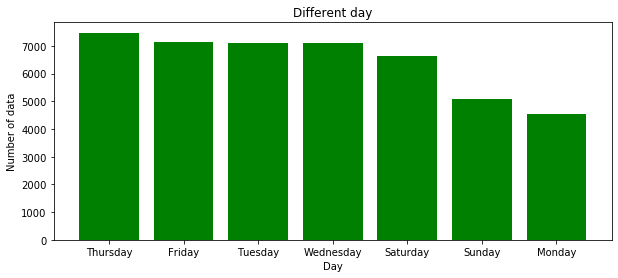

In [63]:
fig = plt.figure(figsize=(10, 4))
  

plt.bar(data['Day'].unique(), data['Day'].value_counts(), color='green')
 
plt.xlabel("Day")
plt.ylabel("Number of data")
plt.title("Different day")
plt.show()

In [64]:
data = pd.get_dummies(data, columns=['Day'])

In [65]:
data.head()

,Report Date,Route,Time,Min Gap,Vehicle,Delay,Direction_e,Direction_n,Direction_s,Direction_w,...,Incident_Mechanical,Incident_Overhead - Pantograph,Incident_Utilized Off Route,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,2014-01-02,505,06:31:00,8,4018,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2014-01-02,504,12:43:00,22,4128,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2014-01-02,501,14:01:00,19,4016,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2014-01-02,504,14:22:00,11,4175,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2014-01-02,504,16:42:00,6,4080,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [66]:
data.shape

(45044, 26)


### Date and Time
Instead of the Report Date column, I will add the Year, Month and Day columns and instead of the Time column I will add the Hour column

In [67]:
data.head()

,Report Date,Route,Time,Min Gap,Vehicle,Delay,Direction_e,Direction_n,Direction_s,Direction_w,...,Incident_Mechanical,Incident_Overhead - Pantograph,Incident_Utilized Off Route,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,2014-01-02,505,06:31:00,8,4018,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2014-01-02,504,12:43:00,22,4128,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2014-01-02,501,14:01:00,19,4016,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2014-01-02,504,14:22:00,11,4175,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2014-01-02,504,16:42:00,6,4080,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [68]:
# Creating the year column from column Report Date.
data['Year'] = data['Report Date'].dt.year

# Creating the month column from column Report Date.
data['Month'] = data['Report Date'].dt.month

# Creating the day column from column Report Date.
data['Day'] = data['Report Date'].dt.day

# Creating the hour column from column Time.
data[['Hour']] = pd.DataFrame([(x.hour) for x in data['Time']])

In [69]:
data.head()

,Report Date,Route,Time,Min Gap,Vehicle,Delay,Direction_e,Direction_n,Direction_s,Direction_w,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
0,2014-01-02,505,06:31:00,8,4018,1,1,0,0,0,...,0,0,0,1,0,0,2014,1,2,6
1,2014-01-02,504,12:43:00,22,4128,1,1,0,0,0,...,0,0,0,1,0,0,2014,1,2,12
2,2014-01-02,501,14:01:00,19,4016,1,0,0,0,1,...,0,0,0,1,0,0,2014,1,2,14
3,2014-01-02,504,14:22:00,11,4175,1,0,0,0,1,...,0,0,0,1,0,0,2014,1,2,14
4,2014-01-02,504,16:42:00,6,4080,1,1,0,0,0,...,0,0,0,1,0,0,2014,1,2,16


In [70]:
data.shape

(45044, 30)

In [71]:
data = data.drop(columns=[ 'Report Date' , 'Time'])

In [72]:
data.head()

,Route,Min Gap,Vehicle,Delay,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
0,505,8,4018,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,6
1,504,22,4128,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,12
2,501,19,4016,1,0,0,0,1,0,0,...,0,0,0,1,0,0,2014,1,2,14
3,504,11,4175,1,0,0,0,1,0,0,...,0,0,0,1,0,0,2014,1,2,14
4,504,6,4080,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,16


In [73]:
data.shape

(45044, 28)

### Delay throug the year

In [74]:
Year_2014 = data[data['Year'] == 2014]['Delay']

Year_2015 = data[data['Year'] == 2015]['Delay']

Year_2016 = data[data['Year'] == 2016]['Delay']

Year_2017 = data[data['Year'] == 2017]['Delay']

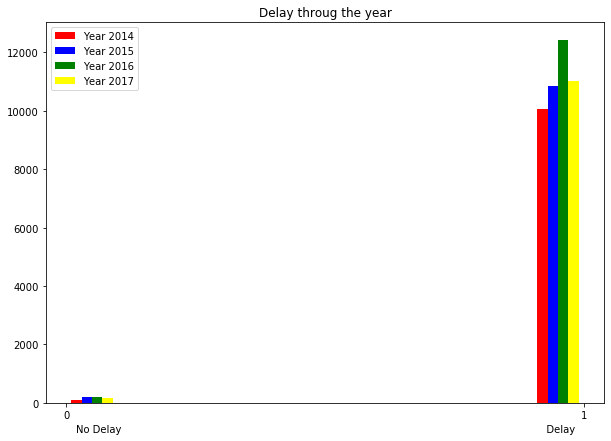

In [76]:
fig = plt.figure(figsize=(10, 7))
  
plt.title("Delay throug the year")
plt.xticks([0 , 1])         
plt.xlabel('No Delay                                                                                                                                        Delay')
plt.hist([Year_2014 , Year_2015 , Year_2016 , Year_2017], color=['red', 'blue', 'green', 'yellow'], label=['Year 2014' , 'Year 2015' , 'Year 2016' , 'Year 2017'])
plt.legend(loc='best')
plt.show()

### Oversampling 
Since the data is not balanced I will do Oversampling

In [77]:
oversampling_set = data[data['Delay'] == 0.0]

In [78]:
data_balanced  = data

In [79]:
for x in range(50):
    oversampling_set  = shuffle(oversampling_set)
    data_balanced = data_balanced.append(oversampling_set)
    data_balanced  = shuffle(data_balanced )

In [80]:
data_balanced  = shuffle(data_balanced )

In [81]:
print("Without delay ", data_balanced[data_balanced['Delay']==0].shape[0])
print("With delay ", data_balanced[data_balanced['Delay']==1].shape[0])

Without delay  34068
With delay  44376


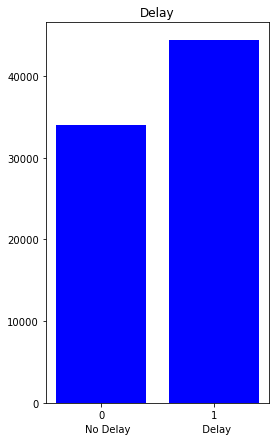

In [82]:
fig = plt.figure(figsize=(4, 7))
plt.bar(data_balanced['Delay'].unique(), data_balanced['Delay'].value_counts(), color='blue')
plt.xticks([0, 1])  
plt.xlabel('No Delay                       Delay')
plt.title("Delay")
plt.show()

In [83]:
data_balanced

,Route,Min Gap,Vehicle,Delay,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
754,510,12,2322,1,0,0,1,0,0,0,...,0,0,0,1,0,0,2016,3,24,18
283,504,0,4070,0,0,0,0,1,0,0,...,0,0,0,0,1,0,2016,2,9,16
877,501,0,4226,0,1,0,0,0,0,1,...,0,0,0,1,0,0,2014,5,29,6
442,502,24,8191,1,1,0,0,0,0,0,...,0,0,0,0,0,1,2017,8,16,12
487,510,0,4435,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2017,8,18,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,506,5,4054,1,0,0,0,1,0,0,...,1,0,0,0,0,0,2015,4,6,14
846,511,18,4194,0,0,0,1,0,0,0,...,0,0,0,0,0,1,2016,5,25,0
737,512,0,4156,0,0,0,0,1,0,0,...,0,0,0,1,0,0,2014,9,18,11
835,501,17,4149,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2016,6,23,18


In [84]:
data_balanced.describe() 

,Route,Min Gap,Vehicle,Delay,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
count,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,...,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000
mean,502.700487,11.364986,4299.540908,0.565703,0.386505,0.104355,0.093965,0.415175,0.023291,0.028173,...,0.139896,0.112654,0.101002,0.172390,0.157998,0.147443,2015.573556,6.374254,15.879621,10.750433
std,26.667264,29.411028,1433.941371,0.495667,0.486952,0.305722,0.291782,0.492755,0.150826,0.165468,...,0.346881,0.316171,0.301333,0.377722,0.364742,0.354549,1.059206,3.400198,8.883369,5.436824
min,301.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000
25%,504.000000,0.000000,4076.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,4.000000,8.000000,6.000000
50%,505.000000,8.000000,4152.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,6.000000,16.000000,10.000000
75%,510.000000,14.000000,4227.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,9.000000,24.000000,15.000000
max,512.000000,4216.000000,163242.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2017.000000,12.000000,31.000000,23.000000


In [85]:
feature_names = data_balanced.columns
# for col in feature_names:
#     print(col)

In [86]:
corrcoefs = data_balanced.corr()['Delay']
corrcoefs

Route                            -0.034926
Min Gap                           0.278729
Vehicle                           0.004735
Delay                             1.000000
Direction_e                       0.048985
Direction_n                      -0.087057
Direction_s                      -0.077461
Direction_w                       0.051473
Incident_Diversion               -0.073416
Incident_Emergency Services       0.006497
Incident_General Delay           -0.174988
Incident_Held By                  0.144867
Incident_Investigation           -0.056236
Incident_Late Leaving Garage      0.077048
Incident_Mechanical               0.061083
Incident_Overhead - Pantograph    0.008277
Incident_Utilized Off Route      -0.080581
Day_Friday                       -0.032804
Day_Monday                        0.024392
Day_Saturday                      0.001048
Day_Sunday                       -0.002310
Day_Thursday                     -0.020291
Day_Tuesday                      -0.001645
Day_Wednesd

In [87]:
# corrcoefs_for_barh = ( (corrcoefs.drop('Delay')) * 1000000 ).astype(int)
corrcoefs_for_barh = corrcoefs.drop('Delay')
corrcoefs_for_barh


Route                            -0.034926
Min Gap                           0.278729
Vehicle                           0.004735
Direction_e                       0.048985
Direction_n                      -0.087057
Direction_s                      -0.077461
Direction_w                       0.051473
Incident_Diversion               -0.073416
Incident_Emergency Services       0.006497
Incident_General Delay           -0.174988
Incident_Held By                  0.144867
Incident_Investigation           -0.056236
Incident_Late Leaving Garage      0.077048
Incident_Mechanical               0.061083
Incident_Overhead - Pantograph    0.008277
Incident_Utilized Off Route      -0.080581
Day_Friday                       -0.032804
Day_Monday                        0.024392
Day_Saturday                      0.001048
Day_Sunday                       -0.002310
Day_Thursday                     -0.020291
Day_Tuesday                      -0.001645
Day_Wednesday                     0.035115
Year       

IndexError: arrays used as indices must be of integer (or boolean) type

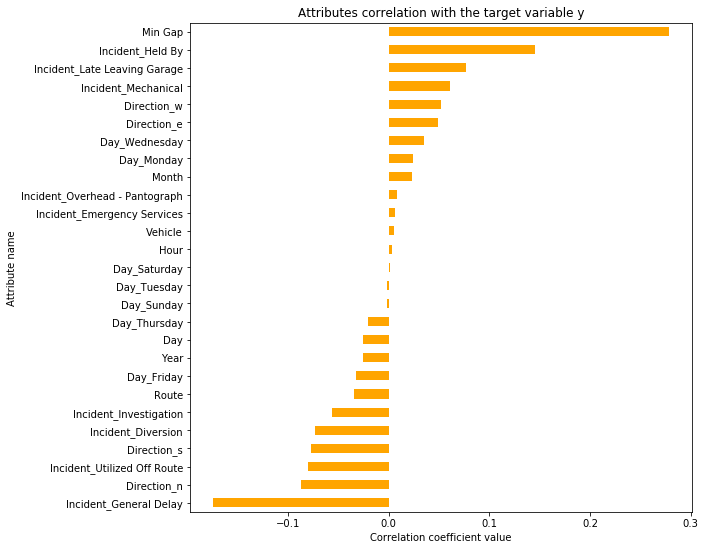

In [88]:
number_of_features = len(data.columns)

coefs_for_plot = pd.Series(corrcoefs_for_barh).sort_values()
coefs_for_plot.plot(kind = "barh", color = 'orange', figsize = (9, 9))

plt.title("Attributes correlation with the target variable y" )
plt.ylabel('Attribute name')
plt.xlabel('Correlation coefficient value')
plt.yticks(np.arange(number_of_features), list(feature_names[coefs_for_plot.index]))
plt.plot()

In [89]:
y = data_balanced['Delay']
X = data_balanced.drop(columns=['Delay'])

In [90]:
X.corr()

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
Route,1.000000,-0.090835,-0.000206,-0.007527,0.056262,0.065490,-0.066248,-0.068125,-0.115807,0.066561,...,0.025761,-0.076482,-0.057406,0.022075,-0.004348,0.038360,-0.015195,-0.024061,-0.011307,-0.001935
Min Gap,-0.090835,1.000000,-0.012631,-0.012296,-0.051257,-0.036179,0.065376,0.088779,0.088769,-0.056070,...,0.000389,0.008964,0.024205,-0.025578,0.016828,-0.002881,-0.009246,0.013451,-0.018059,-0.006272
Vehicle,-0.000206,-0.012631,1.000000,0.029031,0.025599,-0.014690,-0.035873,-0.020570,0.012695,-0.044952,...,0.008296,0.021635,0.024436,-0.040605,-0.002598,-0.002825,-0.108997,0.031157,-0.001586,0.013271
Direction_e,-0.007527,-0.012296,0.029031,1.000000,-0.270932,-0.255613,-0.668767,-0.017383,-0.018855,0.150019,...,0.020339,-0.020828,-0.035471,-0.006980,0.028255,0.020282,-0.043491,-0.033423,-0.016545,-0.024280
Direction_n,0.056262,-0.051257,0.025599,-0.270932,1.000000,-0.109926,-0.287601,-0.025340,-0.025106,-0.072576,...,-0.014808,-0.009256,-0.007168,-0.043958,0.018935,0.016469,0.031135,-0.037375,-0.034034,0.029090
Direction_s,0.065490,-0.036179,-0.014690,-0.255613,-0.109926,1.000000,-0.271340,-0.008306,0.020948,-0.069629,...,-0.007579,0.009898,0.009934,-0.016505,-0.002708,0.022575,0.043613,0.032938,0.010645,0.029907
Direction_w,-0.066248,0.065376,-0.035873,-0.668767,-0.287601,-0.271340,1.000000,0.037818,0.021805,-0.061993,...,-0.006424,0.020465,0.033618,0.043944,-0.038067,-0.043629,-0.002163,0.036714,0.031163,-0.011764
Incident_Diversion,-0.068125,0.088779,-0.020570,-0.017383,-0.025340,-0.008306,0.037818,1.000000,-0.026292,-0.043165,...,-0.005748,0.045228,0.047816,-0.036912,-0.032596,0.004201,0.024028,0.008930,-0.021989,0.003933
Incident_Emergency Services,-0.115807,0.088769,0.012695,-0.018855,-0.025106,0.020948,0.021805,-0.026292,1.000000,-0.047593,...,0.002627,0.058491,-0.008236,-0.006116,0.007778,-0.029954,0.000469,0.033781,0.020867,0.014830
Incident_General Delay,0.066561,-0.056070,-0.044952,0.150019,-0.072576,-0.069629,-0.061993,-0.043165,-0.047593,1.000000,...,-0.011242,-0.052943,0.004047,0.024207,-0.006500,0.013977,-0.077786,-0.015583,0.014625,-0.039306


In [91]:
number_of_features = X.shape[1]

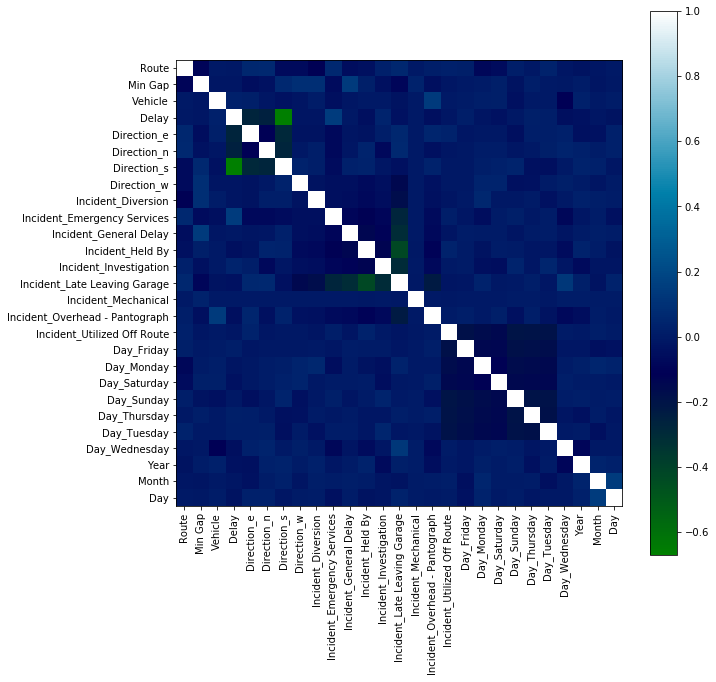

In [94]:
plt.figure(figsize = (10, 10))
plt.xticks(range(0, number_of_features), feature_names, rotation='vertical')
plt.yticks(range(0, number_of_features), feature_names)
plt.imshow(X.corr(), cmap='ocean')
plt.colorbar()
plt.show()

# Logistic regression

In [95]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

In [96]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 7, stratify = y)

In [97]:
X_train.shape

(52557, 27)

In [98]:
X_test.shape

(25887, 27)

In [99]:
 y_train.shape
    

(52557,)

In [100]:
y_test.shape

(25887,)

In [101]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
wd_train = np.sum(y_train == 0)
d_train = np.sum(y_train == 1)
print('Delay: ', d_train, '     Without Delay: ', wd_train)

Delay:  29732      Without Delay:  22825


In [103]:
wd_test = np.sum(y_test == 0)
d_test = np.sum(y_test == 1)
print('Delay: ', d_test, '     Without Delay: ', wd_test)

Delay:  14644      Without Delay:  11243


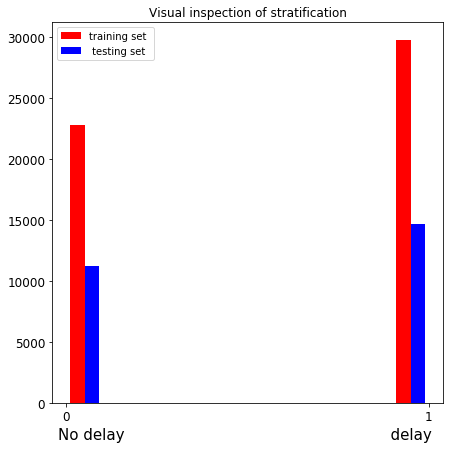

In [104]:
plt.figure(figsize = (7, 7))
matplotlib.rc('xtick', labelsize = 12) 
matplotlib.rc('ytick', labelsize = 12) 
plt.title("Visual inspection of stratification")
plt.xticks([0,1])
plt.xlabel('No delay                                                        delay ', fontsize = 15 )
plt.hist([y_train, y_test], color=['red', 'blue'], label=['training set ',' testing set'])
plt.legend(loc='best')
plt.show()

## Učenje modela

In [105]:
model = linear_model.LogisticRegression(solver='lbfgs')

In [106]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
model.intercept_

array([1.45473778])

In [108]:
model.coef_

array([[ 2.03722670e-01,  6.67486934e+00, -7.18611120e-03,
         7.50976213e-02, -6.77316212e-02, -3.94248330e-02,
        -8.84575009e-03, -2.34870994e-01, -2.18229143e-01,
        -2.40403729e-01,  6.18308212e-02, -1.06395904e-01,
         2.44388249e-01,  1.70133396e-01,  5.58467876e-02,
        -1.06891407e-04, -2.25178902e-02,  4.06509979e-02,
        -4.07437462e-02, -4.92074574e-02,  1.22795059e-02,
        -7.94734434e-03,  5.71873002e-02, -1.18709036e-01,
         4.32244837e-02, -1.89757976e-02,  4.04721887e-03]])

## Evaluacija

In [109]:
y_test_predicted = model.predict(X_test)

In [110]:
metrics.accuracy_score(y_test, y_test_predicted)

0.935836520261135

In [111]:
metrics.precision_score(y_test, y_test_predicted)

0.937049754258399

In [112]:
metrics.recall_score(y_test, y_test_predicted)

0.9504233815897296

In [113]:
metrics.f1_score(y_test, y_test_predicted)

0.9436891887310573

In [114]:
y_train_predicted = model.predict(X_train)

In [115]:
y_train_predicted[:50]

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1], dtype=int64)

In [116]:
train_score = metrics.accuracy_score(y_train, y_train_predicted)

In [117]:
test_score = metrics.accuracy_score(y_test, y_test_predicted)

In [118]:
print("Accuracy at the training set: {train}\nAccuracy at the test set: {test}".format(train=train_score, test=test_score))

Accuracy at the training set: 0.9340335255056414
Accuracy at the test set: 0.935836520261135


In [119]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11243
           1       0.94      0.95      0.94     14644

    accuracy                           0.94     25887
   macro avg       0.94      0.93      0.93     25887
weighted avg       0.94      0.94      0.94     25887



In [120]:
metrics.confusion_matrix(y_test, y_test_predicted)

array([[10308,   935],
       [  726, 13918]], dtype=int64)

# Neural networks

In [121]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.layers import Dropout
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection
from keras import optimizers
from keras import losses

In [122]:
np.random.seed(7)

## Creating Neural networks

We will create a neural network with advance propagation. <br> The neural network will have an input layer, three hidden layers with, respectively, 100, 40 and 20 neurons, and an output layer. <br> The number of input layer neurons corresponds to the number of attributes of the data set, which is 27. <br> The number of output layer neurons is 1 since it is a binary classification. <br> In hidden layers I will use relu activation function and in the latter sigmoid function. <br> Optimizer Adam will be used. <br> Binary cross entropy as a function of error will be used. <br> Since the task of classification metrics will be accuracy. <br> I will use Dropout regularization for reducing overfitting and improving the generalization. 

In [123]:
number_of_features = X_train.shape[1]
output_size = 1

In [124]:
number_of_features

27

In [125]:
model = Sequential()
model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=output_size, activation='sigmoid'))

In [126]:
model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [127]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2800      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [128]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/50
1314/1314 [==============================] - 10s 7ms/step - loss: 0.5530 - accuracy: 0.7346 - val_loss: 0.4065 - val_accuracy: 0.8662
Epoch 2/50
1314/1314 [==============================] - 8s 6ms/step - loss: 0.3100 - accuracy: 0.9057 - val_loss: 0.2362 - val_accuracy: 0.9335
Epoch 3/50
1314/1314 [==============================] - 7s 6ms/step - loss: 0.2097 - accuracy: 0.9389 - val_loss: 0.1833 - val_accuracy: 0.9435
Epoch 4/50
1314/1314 [==============================] - 7s 6ms/step - loss: 0.1725 - accuracy: 0.9479 - val_loss: 0.1586 - val_accuracy: 0.9463
Epoch 5/50
1314/1314 [==============================] - 7s 5ms/step - loss: 0.1524 - accuracy: 0.9522 - val_loss: 0.1458 - val_accuracy: 0.9495
Epoch 6/50
1314/1314 [==============================] - 8s 6ms/step - loss: 0.1360 - accuracy: 0.9559 - val_loss: 0.1340 - val_accuracy: 0.9565
Epoch 7/50
1314/1314 [==============================] - 7s 5ms/step - loss: 0.1262 - accuracy: 0.9594 - val_loss: 0.1242 - val_accuracy

In [129]:
epochs = history.epoch

In [130]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

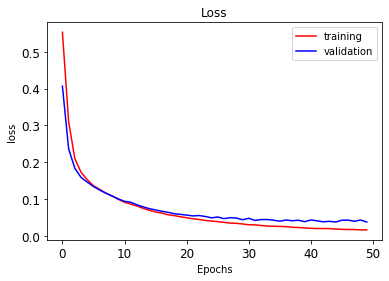

In [131]:
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='blue', label='validation')
plt.legend(loc='best')

In [132]:
acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

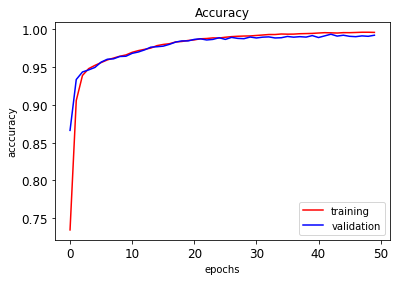

In [133]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='blue', label='validation')
plt.legend(loc='best')

## Neural network evaluation

In [134]:
final_model = Sequential()
final_model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
final_model.add(Dense(units=40, activation='relu'))
final_model.add(Dense(units=20, activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(units=output_size, activation='sigmoid'))
final_model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [135]:
history = final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose = 1)

Epoch 1/50
1643/1643 [==============================] - 10s 6ms/step - loss: 0.5316 - accuracy: 0.7424
Epoch 2/50
1643/1643 [==============================] - 10s 6ms/step - loss: 0.2793 - accuracy: 0.9208
Epoch 3/50
1643/1643 [==============================] - 8s 5ms/step - loss: 0.1989 - accuracy: 0.9425
Epoch 4/50
1643/1643 [==============================] - 10s 6ms/step - loss: 0.1602 - accuracy: 0.9484
Epoch 5/50
1643/1643 [==============================] - 9s 5ms/step - loss: 0.1374 - accuracy: 0.9543
Epoch 6/50
1643/1643 [==============================] - 10s 6ms/step - loss: 0.1221 - accuracy: 0.9587
Epoch 7/50
1643/1643 [==============================] - 10s 6ms/step - loss: 0.1100 - accuracy: 0.9624 1s - l - ETA: 0s - los
Epoch 8/50
1643/1643 [==============================] - 9s 6ms/step - loss: 0.1003 - accuracy: 0.9653
Epoch 9/50
1643/1643 [==============================] - 8s 5ms/step - loss: 0.0914 - accuracy: 0.9687
Epoch 10/50
1643/1643 [==============================]

In [136]:
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_accuracy))

809/809 [==============================] - 3s 3ms/step - loss: 0.0287 - accuracy: 0.9943
Test loss: 0.028727687895298004, test accuracy: 0.9943214654922485


In [137]:
train_loss, train_accuracy = final_model.evaluate(X_train, y_train)
print ("Train loss: {}, train accuracy: {}".format(train_loss, train_accuracy))

1643/1643 [==============================] - 6s 4ms/step - loss: 0.0104 - accuracy: 0.9980
Train loss: 0.010357297956943512, train accuracy: 0.9980401992797852


## Save model

In [138]:
from keras.models import load_model

In [139]:
model.save('final_model.h5') 